In [1]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import Flatten

max_features = 15000
text_max_words = 120

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)

# 훈련셋과 검증셋 분리
x_val = x_train[7000:]
y_val = y_train[7000:]
x_train = x_train[:7000]
y_train = y_train[:7000]

# 데이터셋 전처리 : 문장 길이 맞추기
x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)

# one-hot 인코딩
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

Using TensorFlow backend.


# MLP

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 7000 samples, validate on 1982 samples
Epoch 1/10
7000/7000 [==============================] - 1s 167us/step - loss: 1.9028 - accuracy: 0.5274 - val_loss: 1.4655 - val_accuracy: 0.6589
Epoch 2/10
7000/7000 [==============================] - 1s 126us/step - loss: 0.8164 - accuracy: 0.8180 - val_loss: 1.2896 - val_accuracy: 0.7013
Epoch 3/10
7000/7000 [==============================] - 1s 130us/step - loss: 0.2713 - accuracy: 0.9500 - val_loss: 1.4160 - val_accuracy: 0.6847
Epoch 4/10
7000/7000 [==============================] - 1s 134us/step - loss: 0.1849 - accuracy: 0.9619 - val_loss: 1.3713 - val_accuracy: 0.6902
Epoch 5/10
7000/7000 [==============================] - 1s 126us/step - loss: 0.1550 - accuracy: 0.9633 - val_loss: 1.3889 - val_accuracy: 0.6837
Epoch 6/10
7000/7000 [==============================] - 1s 125us/step - loss: 0.1308 - accuracy: 0.9639 - val_loss: 1.3712 - val_accuracy: 0.6892
Epoch 7/10
7000/7000 [==============================] - 1s 128us/step - loss

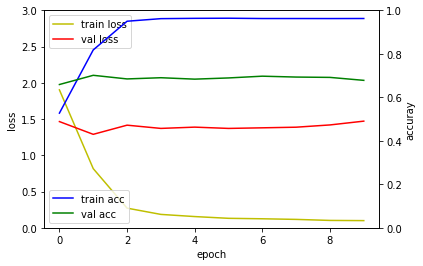

2246/2246 [==============================] - 0s 25us/step
## evaluation loss and_metrics ##
[1.5135231283447728, 0.6691896915435791]


In [2]:
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import Flatten
# 2. 모델 구성하기
model = Sequential()
model.add(Embedding(max_features, 128, input_length=text_max_words))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(46, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 3.0])

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylim([0.0, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

# LSTM

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 7000 samples, validate on 1982 samples
Epoch 1/10
7000/7000 [==============================] - 6s 918us/step - loss: 2.4623 - accuracy: 0.3750 - val_loss: 1.9934 - val_accuracy: 0.4879
Epoch 2/10
7000/7000 [==============================] - 6s 893us/step - loss: 1.9182 - accuracy: 0.4904 - val_loss: 2.0206 - val_accuracy: 0.4864
Epoch 3/10
7000/7000 [==============================] - 6s 891us/step - loss: 1.7818 - accuracy: 0.5260 - val_loss: 2.0708 - val_accuracy: 0.5192
Epoch 4/10
7000/7000 [==============================] - 6s 894us/step - loss: 1.5215 - accuracy: 0.6000 - val_loss: 1.5884 - val_accuracy: 0.5923
Epoch 5/10
7000/7000 [==============================] - 6s 888us/step - loss: 1.3180 - accuracy: 0.6514 - val_loss: 1.5221 - val_accuracy: 0.6221
Epoch 6/10
7000/7000 [==============================] - 6s 891us/step - loss: 1.1056 - accuracy: 0.7051 - val_loss: 1.4535 - val_accuracy: 0.6443
Epoch 7/10
7000/7000 [==============================] - 6s 890us/step - loss

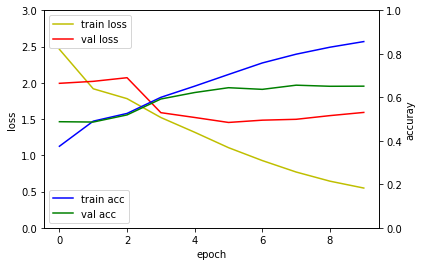

2246/2246 [==============================] - 0s 192us/step
## evaluation loss and_metrics ##
[1.7004080791082747, 0.6291184425354004]


In [5]:
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Flatten

#2. 모델 구성하기
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128))
model.add(Dense(46, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 3.0])

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylim([0.0, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

# CNN

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 7000 samples, validate on 1982 samples
Epoch 1/10
7000/7000 [==============================] - 2s 268us/step - loss: 2.3013 - accuracy: 0.4479 - val_loss: 1.7806 - val_accuracy: 0.5212
Epoch 2/10
7000/7000 [==============================] - 1s 130us/step - loss: 1.5940 - accuracy: 0.6157 - val_loss: 1.3412 - val_accuracy: 0.6811
Epoch 3/10
7000/7000 [==============================] - 1s 129us/step - loss: 1.2321 - accuracy: 0.7077 - val_loss: 1.1818 - val_accuracy: 0.7195
Epoch 4/10
7000/7000 [==============================] - 1s 127us/step - loss: 1.0108 - accuracy: 0.7579 - val_loss: 1.1165 - val_accuracy: 0.7457
Epoch 5/10
7000/7000 [==============================] - 1s 133us/step - loss: 0.7837 - accuracy: 0.8101 - val_loss: 1.0237 - val_accuracy: 0.7614
Epoch 6/10
7000/7000 [==============================] - 1s 132us/step - loss: 0.5919 - accuracy: 0.8551 - val_loss: 1.0373 - val_accuracy: 0.7619
Epoch 7/10
7000/7000 [==============================] - 1s 126us/step - loss

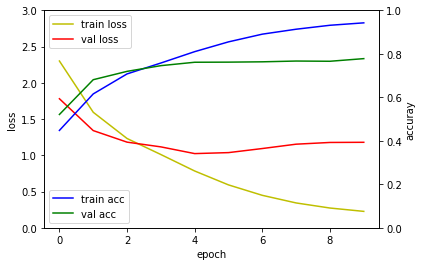

2246/2246 [==============================] - 0s 35us/step
## evaluation loss and_metrics ##
[1.29212456055231, 0.7515583038330078]


In [7]:
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Flatten, Dropout
from keras.layers import Conv1D, GlobalMaxPooling1D

# 2. 모델 구성하기
model = Sequential()
model.add(Embedding(max_features, 128, input_length=text_max_words))
model.add(Dropout(0.2))
model.add(Conv1D(256,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(46, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 3.0])

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylim([0.0, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

# LSTM-CNN

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 7000 samples, validate on 1982 samples
Epoch 1/10
7000/7000 [==============================] - 3s 412us/step - loss: 2.1672 - accuracy: 0.4519 - val_loss: 1.7325 - val_accuracy: 0.5404
Epoch 2/10
7000/7000 [==============================] - 2s 352us/step - loss: 1.5633 - accuracy: 0.6007 - val_loss: 1.5021 - val_accuracy: 0.6206
Epoch 3/10
7000/7000 [==============================] - 2s 347us/step - loss: 1.2462 - accuracy: 0.6810 - val_loss: 1.3111 - val_accuracy: 0.6731
Epoch 4/10
7000/7000 [==============================] - 2s 348us/step - loss: 0.9983 - accuracy: 0.7459 - val_loss: 1.2672 - val_accuracy: 0.6887
Epoch 5/10
7000/7000 [==============================] - 3s 364us/step - loss: 0.8177 - accuracy: 0.7867 - val_loss: 1.2488 - val_accuracy: 0.7003
Epoch 6/10
7000/7000 [==============================] - 2s 355us/step - loss: 0.6771 - accuracy: 0.8259 - val_loss: 1.3467 - val_accuracy: 0.6847
Epoch 7/10
7000/7000 [==============================] - 2s 353us/step - loss

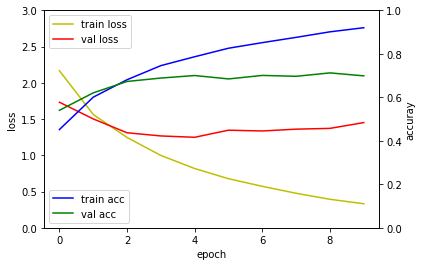

2246/2246 [==============================] - 0s 124us/step
## evaluation loss and_metrics ##
[1.5368656075011378, 0.6727515459060669]


In [8]:
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Flatten, Dropout
from keras.layers import Conv1D, MaxPooling1D
# 2. 모델 구성하기
model = Sequential()
model.add(Embedding(max_features, 128, input_length=text_max_words))
model.add(Dropout(0.2))
model.add(Conv1D(256,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(128))
model.add(Dense(46, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 3.0])

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylim([0.0, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)